<a href="https://colab.research.google.com/github/DATASCIENCE-PROJECT-GROUP/dspl/blob/main/DSPL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

TRAIN.CSV - EDA before cleaning

In [5]:
import pandas as pd

In [6]:
df = pd.read_csv('/content/traincsv.csv')

<ipython-input-6-92b38fa63386>:1: DtypeWarning: Columns (3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/traincsv.csv')


In [7]:
df.head()

,Customer_ID,outlet_city,luxury_sales,fresh_sales,dry_sales,cluster_catgeory
0,10493832.0,Kelaniya,1209.6,756.0,5292.0,4
1,10178643.0,Moratuwa,1590.12,1060.08,6007.12,1
2,10513916.0,Wattala,2288.88,1481.04,9155.52,4
3,10334589.0,Wattala,2274.94,1739.66,9099.76,4
4,10458365.0,Kelaniya,2345.49,2069.55,9243.99,4


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822190 entries, 0 to 822189
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Customer_ID       822186 non-null  float64
 1   outlet_city       822186 non-null  object 
 2   luxury_sales      822153 non-null  object 
 3   fresh_sales       822143 non-null  object 
 4   dry_sales         822154 non-null  object 
 5   cluster_catgeory  822187 non-null  object 
dtypes: float64(1), object(5)
memory usage: 37.6+ MB


In [9]:
import pandas as pd

# Display first few rows
print(df.head())

# Check data types and missing values
print(df.info())

# Get summary statistics
print(df.describe())

   Customer_ID outlet_city luxury_sales fresh_sales dry_sales cluster_catgeory
0   10493832.0    Kelaniya       1209.6       756.0    5292.0                4
1   10178643.0    Moratuwa      1590.12     1060.08   6007.12                1
2   10513916.0     Wattala      2288.88     1481.04   9155.52                4
3   10334589.0     Wattala      2274.94     1739.66   9099.76                4
4   10458365.0    Kelaniya      2345.49     2069.55   9243.99                4
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822190 entries, 0 to 822189
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Customer_ID       822186 non-null  float64
 1   outlet_city       822186 non-null  object 
 2   luxury_sales      822153 non-null  object 
 3   fresh_sales       822143 non-null  object 
 4   dry_sales         822154 non-null  object 
 5   cluster_catgeory  822187 non-null  object 
dtypes: float64(1), object(5)
me

In [10]:
# Check for missing values
print(df.isnull().sum())

# Option 1: Fill missing values with appropriate strategy
df.fillna(method='ffill', inplace=True)  # Forward fill (or use mean/median)

# Option 2: Drop missing values if they are not significant
df.dropna(inplace=True)

Customer_ID          4
outlet_city          4
luxury_sales        37
fresh_sales         47
dry_sales           36
cluster_catgeory     3
dtype: int64


<ipython-input-10-c2e95a0d4967>:5: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill (or use mean/median)


In [11]:
# Check for missing values
print(df.isnull().sum())


Customer_ID         0
outlet_city         0
luxury_sales        0
fresh_sales         0
dry_sales           0
cluster_catgeory    0
dtype: int64


In [12]:
# Convert Customer_ID to integer (if applicable)
df['Customer_ID'] = df['Customer_ID'].astype('int64')

# Check if 'outlet_city' column exists before converting
if 'outlet_city' in df.columns:
    # Convert categorical columns if necessary
    df['outlet_city'] = df['outlet_city'].astype('category')
else:
    print("Column 'outlet_city' not found in the DataFrame.")
    # Handle the missing column as needed, e.g., create it or skip the conversion

In [13]:
import pandas as pd
import numpy as np

# Function to convert non-numeric values to NaN
def clean_numeric(column):
    return pd.to_numeric(column, errors='coerce')  # Converts invalid values to NaN

# Apply the function to all three sales columns
df['luxury_sales'] = clean_numeric(df['luxury_sales'])
df['fresh_sales'] = clean_numeric(df['fresh_sales'])
df['dry_sales'] = clean_numeric(df['dry_sales'])

# Optionally, fill or remove NaN values
df.dropna(subset=['luxury_sales', 'fresh_sales', 'dry_sales'], inplace=True)  # Removes rows with NaN
# Or use df.fillna(0) to replace NaNs with 0

# Verify changes
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
Index: 822166 entries, 0 to 822189
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype   
---  ------            --------------   -----   
 0   Customer_ID       822166 non-null  int64   
 1   outlet_city       822166 non-null  category
 2   luxury_sales      822166 non-null  float64 
 3   fresh_sales       822166 non-null  float64 
 4   dry_sales         822166 non-null  float64 
 5   cluster_catgeory  822166 non-null  object  
dtypes: category(1), float64(3), int64(1), object(1)
memory usage: 38.4+ MB
None
   Customer_ID outlet_city  luxury_sales  fresh_sales  dry_sales  \
0     10493832    Kelaniya       1209.60       756.00    5292.00   
1     10178643    Moratuwa       1590.12      1060.08    6007.12   
2     10513916     Wattala       2288.88      1481.04    9155.52   
3     10334589     Wattala       2274.94      1739.66    9099.76   
4     10458365    Kelaniya       2345.49      2069.55    9243.99   

  cluster_cat

In [14]:
import numpy as np

# Identify outliers using IQR
Q1 = df[['luxury_sales', 'fresh_sales', 'dry_sales']].quantile(0.25)
Q3 = df[['luxury_sales', 'fresh_sales', 'dry_sales']].quantile(0.75)
IQR = Q3 - Q1

# Filter out outliers
df = df[~((df[['luxury_sales', 'fresh_sales', 'dry_sales']] < (Q1 - 1.5 * IQR)) |
          (df[['luxury_sales', 'fresh_sales', 'dry_sales']] > (Q3 + 1.5 * IQR))).any(axis=1)]

In [15]:
# Remove duplicate rows
df.drop_duplicates(inplace=True)

In [16]:
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
Index: 736478 entries, 0 to 822189
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype   
---  ------            --------------   -----   
 0   Customer_ID       736478 non-null  int64   
 1   outlet_city       736478 non-null  category
 2   luxury_sales      736478 non-null  float64 
 3   fresh_sales       736478 non-null  float64 
 4   dry_sales         736478 non-null  float64 
 5   cluster_catgeory  736478 non-null  object  
dtypes: category(1), float64(3), int64(1), object(1)
memory usage: 34.4+ MB
None
   Customer_ID outlet_city  luxury_sales  fresh_sales  dry_sales  \
0     10493832    Kelaniya       1209.60       756.00    5292.00   
1     10178643    Moratuwa       1590.12      1060.08    6007.12   
2     10513916     Wattala       2288.88      1481.04    9155.52   
3     10334589     Wattala       2274.94      1739.66    9099.76   
4     10458365    Kelaniya       2345.49      2069.55    9243.99   

  cluster_cat

In [17]:
# Check unique values in cluster_category
print("Unique values in cluster_category:", df['cluster_catgeory'].unique())

Unique values in cluster_category: ['4' '1' '99' '2' '5' '3' '6' '6\\' 4 2 1 95 3 98 5 6 100.0 89.0]


In [18]:
import pandas as pd

# Convert cluster_category to numeric (handling mixed types)
df['cluster_catgeory'] = pd.to_numeric(df['cluster_catgeory'], errors='coerce')

# Keep only values between 1 and 6
df = df[df['cluster_catgeory'].between(1, 6)]

# Convert to integer type
df['cluster_catgeory'] = df['cluster_catgeory'].astype(int)

# Verify changes
print("Unique values after cleaning:", df['cluster_catgeory'].unique())
print(df.info())
print(df.head())

Unique values after cleaning: [4 1 2 5 3 6]
<class 'pandas.core.frame.DataFrame'>
Index: 736472 entries, 0 to 822189
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype   
---  ------            --------------   -----   
 0   Customer_ID       736472 non-null  int64   
 1   outlet_city       736472 non-null  category
 2   luxury_sales      736472 non-null  float64 
 3   fresh_sales       736472 non-null  float64 
 4   dry_sales         736472 non-null  float64 
 5   cluster_catgeory  736472 non-null  int64   
dtypes: category(1), float64(3), int64(2)
memory usage: 34.4 MB
None
   Customer_ID outlet_city  luxury_sales  fresh_sales  dry_sales  \
0     10493832    Kelaniya       1209.60       756.00    5292.00   
1     10178643    Moratuwa       1590.12      1060.08    6007.12   
2     10513916     Wattala       2288.88      1481.04    9155.52   
3     10334589     Wattala       2274.94      1739.66    9099.76   
4     10458365    Kelaniya       2345.49      2069

<ipython-input-18-cad4c2dafa5e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cluster_catgeory'] = df['cluster_catgeory'].astype(int)


In [19]:
from google.colab import drive
import pandas as pd

# Mount Google Drive
drive.mount('/content/drive')

# Assuming 'df' is your preprocessed DataFrame
file_path = "/content/drive/My Drive/preprocessed_data.csv"

# Save DataFrame as CSV
df.to_csv(file_path, index=False)

print(f"File saved to {file_path}")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
File saved to /content/drive/My Drive/preprocessed_data.csv


In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
# Load the dataset
df = pd.read_csv("/content/preprocessed_data.csv")

In [22]:
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70755 entries, 0 to 70754
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Customer_ID       70755 non-null  int64  
 1   outlet_city       70755 non-null  object 
 2   luxury_sales      70755 non-null  float64
 3   fresh_sales       70755 non-null  float64
 4   dry_sales         70755 non-null  float64
 5   cluster_catgeory  70754 non-null  float64
dtypes: float64(4), int64(1), object(1)
memory usage: 3.2+ MB
None
        Customer_ID  luxury_sales   fresh_sales     dry_sales  \
count  7.075500e+04  70755.000000  70755.000000  70755.000000   
mean   1.038766e+07   1748.643213   1249.690537   6744.729540   
std    2.236142e+05    528.968935    393.834214   1958.277056   
min    1.000000e+07    750.150000    500.200000   3250.000000   
25%    1.019393e+07   1299.360000    923.450000   5047.010000   
50%    1.038782e+07   1733.940000   1229.800000   6741.2400

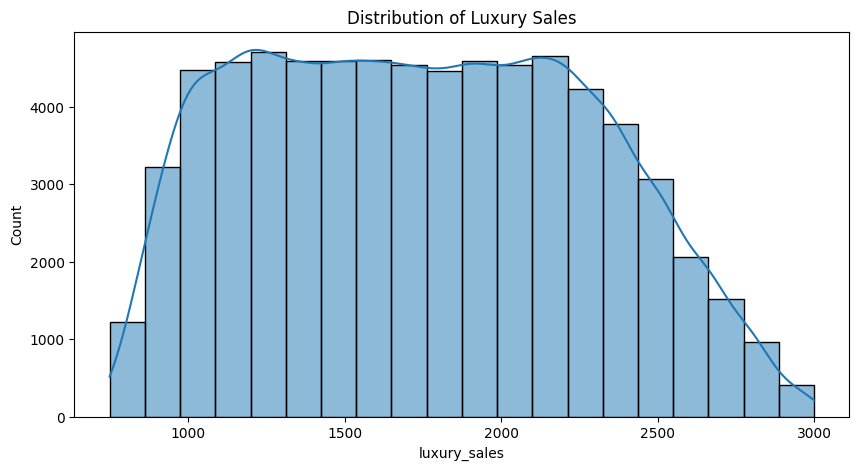

In [23]:
# Univariate Analysis
plt.figure(figsize=(10, 5))
sns.histplot(df['luxury_sales'], bins=20, kde=True)
plt.title("Distribution of Luxury Sales")
plt.show()

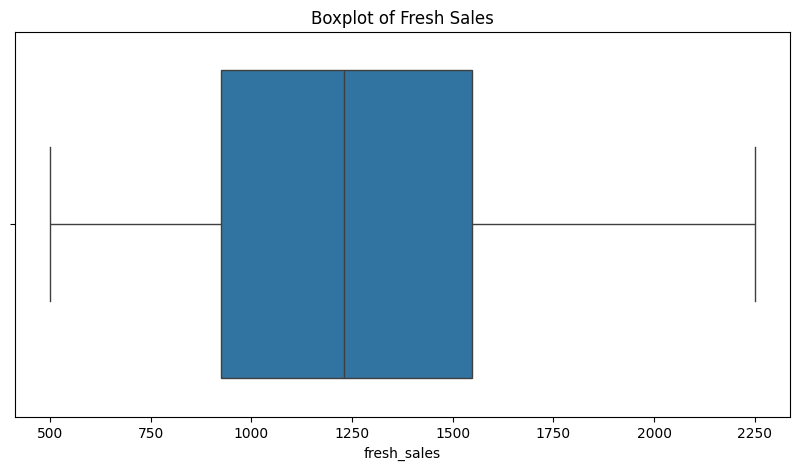

In [25]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=df['fresh_sales'])
plt.title("Boxplot of Fresh Sales")
plt.show()

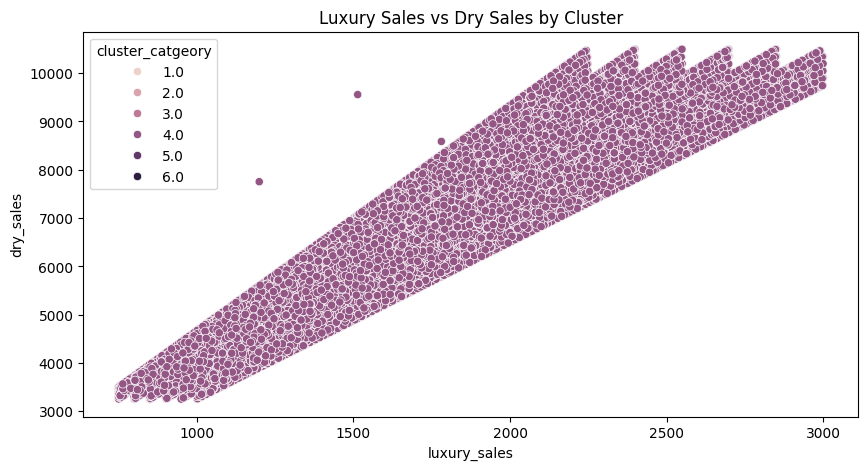

In [26]:
# Bivariate Analysis
plt.figure(figsize=(10, 5))
sns.scatterplot(x=df['luxury_sales'], y=df['dry_sales'], hue=df['cluster_catgeory'])
plt.title("Luxury Sales vs Dry Sales by Cluster")
plt.show()

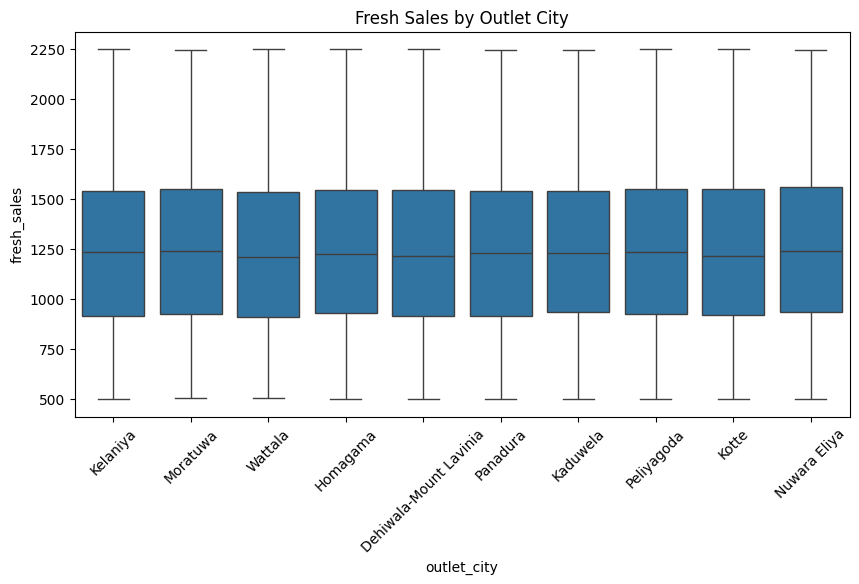

In [27]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='outlet_city', y='fresh_sales', data=df)
plt.title("Fresh Sales by Outlet City")
plt.xticks(rotation=45)
plt.show()

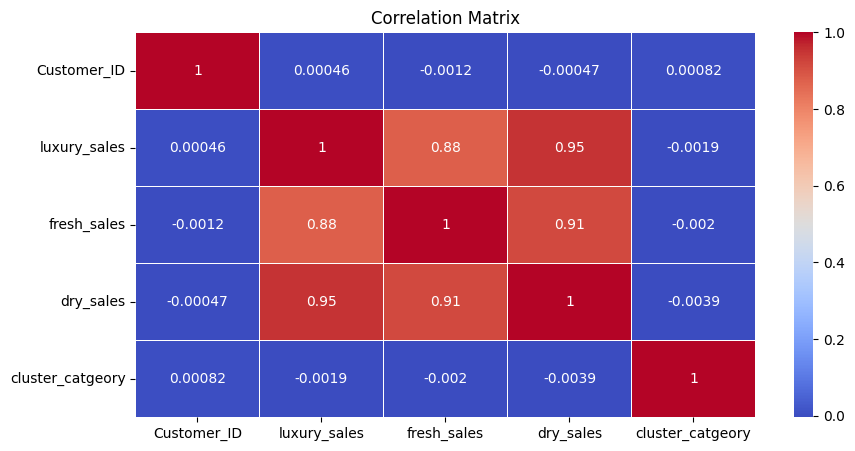

In [28]:
# Multivariate Analysis
plt.figure(figsize=(10, 5))
# Select only numeric columns for correlation calculation
numeric_df = df.select_dtypes(include=['number'])
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

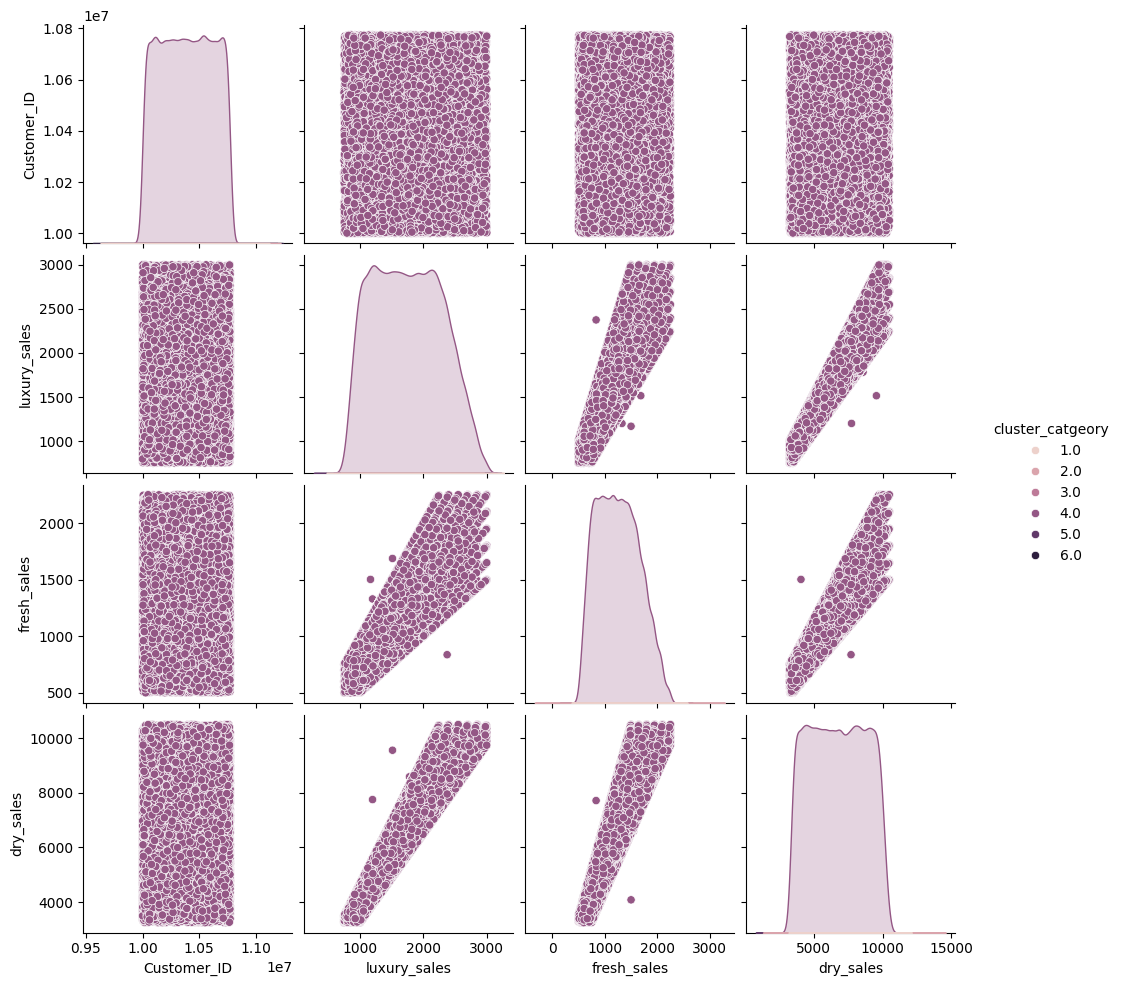

In [29]:
sns.pairplot(df, hue='cluster_catgeory')
plt.show()

In [30]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Encoding Categorical Variable (One-Hot Encoding for 'outlet_city')
encoder = OneHotEncoder(drop='first', sparse_output=False)  # Updated argument
encoded_cities = encoder.fit_transform(df[['outlet_city']])
city_df = pd.DataFrame(encoded_cities, columns=encoder.get_feature_names_out(['outlet_city']))

In [31]:
# Concatenate encoded columns and drop original
df = pd.concat([df, city_df], axis=1)
df.drop(columns=['outlet_city'], inplace=True)

In [32]:
# Scaling Sales Columns
scaler = StandardScaler()
sales_columns = ['luxury_sales', 'fresh_sales', 'dry_sales']
df[sales_columns] = scaler.fit_transform(df[sales_columns])

In [33]:
# Display final processed dataset
print(df.head())

   Customer_ID  luxury_sales  fresh_sales  dry_sales  cluster_catgeory  \
0     10493832     -1.019052    -1.253558  -0.741846               4.0   
1     10178643     -0.299686    -0.481451  -0.376665               1.0   
2     10513916      1.021309     0.587433   1.231086               4.0   
3     10334589      0.994955     1.244110   1.202612               4.0   
4     10458365      1.128329     2.081752   1.276264               4.0   

   outlet_city_Homagama  outlet_city_Kaduwela  outlet_city_Kelaniya  \
0                   0.0                   0.0                   1.0   
1                   0.0                   0.0                   0.0   
2                   0.0                   0.0                   0.0   
3                   0.0                   0.0                   0.0   
4                   0.0                   0.0                   1.0   

   outlet_city_Kotte  outlet_city_Moratuwa  outlet_city_Nuwara Eliya  \
0                0.0                   0.0              

In [34]:
# Save the processed dataset
df.to_csv("processed_data.csv", index=False)